In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import copy

import result_utils

In [2]:
c_d = 'k'; lw_d = 0.8
c_m = 'C1'; lw_m = 0.8

res_alpha = 0.85

path = '/net/schenk/data2/regt/data_backup/JWST_VHS_1256B/retrieval_outputs'
# Res = result_utils.RetrievalResults(f'{path}/g140h_nrs12_eqchem_ret_2/test_')
# Res = result_utils.RetrievalResults(f'{path}/g235h_nrs12_eqchem_ret_1/test_')
Res = result_utils.RetrievalResults(f'{path}/all_gratings_eqchem_ret_1/test_')

Res.load_components(['d_spec', 'LogLike', 'm_spec_broad'])
m_spec_complete = copy.deepcopy(Res.m_spec_broad)

/net/schenk/data2/regt/data_backup/JWST_VHS_1256B/retrieval_outputs/all_gratings_eqchem_ret_1/test_data
  analysing data from /net/schenk/data2/regt/data_backup/JWST_VHS_1256B/retrieval_outputs/all_gratings_eqchem_ret_1/test_.txt


In [43]:
# line_species = '1H2-16O__POKAZATEL'
# line_species = '12C-16O__HITEMP'
# line_species = '13C-16O__HITEMP'
# line_species = '12C-18O__HITEMP'
# line_species = '1H2-32S__AYT2'
# line_species = '1H-19F__Coxon-Hajig'
# line_species = '12C-1H4__MM'
# line_species = '39K__Kurucz'
# line_species = '23Na__Kurucz'
# line_species = '56Fe__Kurucz'
# line_species = '56Fe-1H__MoLLIST'
# line_species = '52Cr-1H__MoLLIST'
# line_species = '51V-16O__HyVO'
# line_species = '48Ti-16O__Toto'
# line_species = '40Ca__Kurucz'
# line_species = '1H-12C-14N__Harris'
# line_species = '14N-1H3__CoYuTe'
# line_species = '52Cr__Kurucz'
# line_species = '12C-16O2__HITEMP'
# line_species = '16O-1H__MYTHOS'
# line_species = '1H-35Cl__HITRAN-HCl'
line_species = '28Si-16O__SiOUVenIR'

# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_1')
# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_2', reload_m_spec=False)
# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_1')
# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_2', reload_m_spec=False)

Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_1')
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_2', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_1', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_2', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g395h_1', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g395h_2', reload_m_spec=False)
m_spec_wo_species = copy.deepcopy(Res.m_spec_broad)

0.000001 % | 1425.5 nm
0.000005 % | 1869.2 nm
0.000004 % | 1874.4 nm
0.000012 % | 3113.5 nm
0.007683 % | 4004.8 nm
0.002470 % | 4125.9 nm


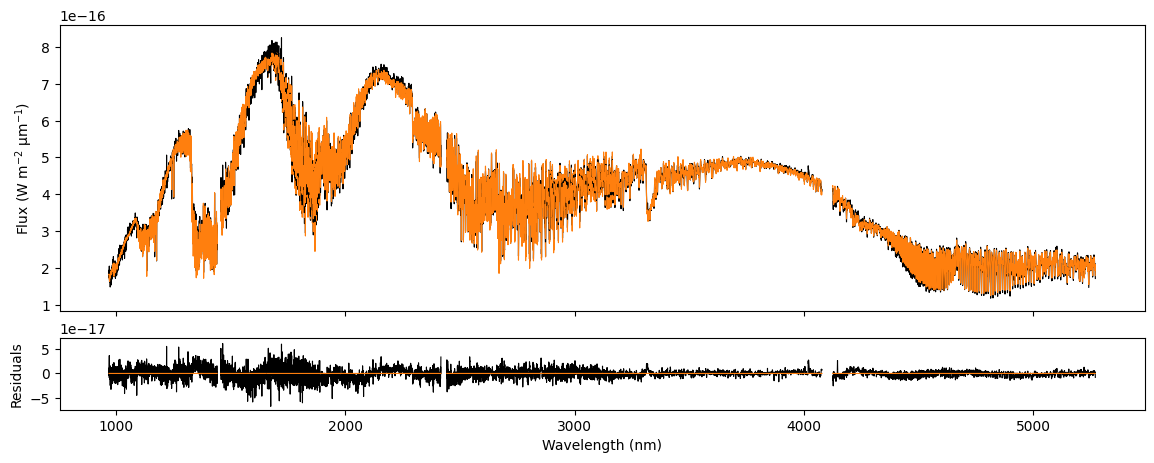

In [44]:
def plot_spectrum(wave_range=None):
    fig = plt.figure(figsize=(14,5))
    gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.15, wspace=0, height_ratios=[0.8,(0.2)])
    ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0])])

    for i, (m_set, d_spec_i) in enumerate(Res.d_spec.items()):
        ax[0].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten(), c=c_d, lw=lw_d)
        ax[0].plot(d_spec_i.wave.flatten(), Res.LogLike.m_flux_phi[i].flatten(), c=c_m, lw=lw_m)

        ax[1].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten() - Res.LogLike.m_flux_phi[i].flatten(), c=c_d, lw=lw_d)
        ax[1].plot(d_spec_i.wave.flatten(), 0*d_spec_i.wave.flatten(), c=c_m, lw=lw_m)

        # ax[0].plot(d_spec_i.wave.flatten(), Res.m_spec_broad[m_set].flux_binned.flatten(), c='r')
        # ax[0].plot(d_spec_i.wave.flatten(), m_spec_wo_species[m_set].flux_binned.flatten(), c='r', lw=lw_m)
        # ax[1].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten() - m_spec_wo_species[m_set].flux_binned.flatten(), c='r', lw=lw_m)
        # ax[1].fill_between(
        #     d_spec_i.wave.flatten(), m_spec_complete[m_set].flux_binned.flatten() - m_spec_wo_species[m_set].flux_binned.flatten(), 0*d_spec_i.wave.flatten(), 
        #     fc='C0', zorder=30, ec='none', 
        # )
        
        kwargs = dict(fc='C0', zorder=-1, ec='none', alpha=res_alpha)
        ax[0].fill_between(
            d_spec_i.wave.flatten(), m_spec_complete[m_set].flux_binned.flatten(), 
            m_spec_wo_species[m_set].flux_binned.flatten(), **kwargs
            )
        ax[1].fill_between(
            d_spec_i.wave.flatten(), (d_spec_i.flux.flatten() - m_spec_wo_species[m_set].flux_binned.flatten()), 
            (d_spec_i.flux.flatten() - m_spec_complete[m_set].flux_binned.flatten()), **kwargs
            )
        
        res = m_spec_wo_species[m_set].flux_binned.flatten() - m_spec_complete[m_set].flux_binned.flatten()
        res = res/m_spec_complete[m_set].flux_binned.flatten()
        idx = np.argmax(res)
        print(f'{np.max(res)*100:.6f} % | {d_spec_i.wave.flatten()[idx]:.1f} nm')


    ax[0].set(ylabel=r'Flux ($\mathrm{W\ m^{-2}\ \mu m^{-1}}$)', xticklabels=[], xlim=wave_range)
    ax[1].set(xlabel=r'Wavelength (nm)', ylabel=r'Residuals', xlim=wave_range)
    plt.show()

plot_spectrum()
# for xmin in np.arange(950, 1900, 150):
#     plot_spectrum([xmin, xmin+150])
# for xmin in np.arange(1600, 3200, 150):
#     plot_spectrum([xmin, xmin+150])

In [45]:
Res.load_components(['Chem'])

In [46]:
Res.Chem['nirspec_g140h_1'].quench_settings

{'CO_CH4': [['12CO', 'CH4', 'H2O'], 10.688632863696087],
 'N2_NH3': [['N2', 'NH3'], 12.760591817791836],
 'HCN': [['HCN'], 13.465459329707175],
 'CO2': [['CO2'], 2.637332090018755]}